In [73]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from kmodes.kmodes import KModes
import os
from joblib import dump, load

In [74]:
outdir = './data/processed_data'

In [75]:
 # read X_train and y_train data from the file
  
X_train = pd.read_csv(os.path.join(outdir, f"diabetes_data_train.csv" ) )
y_train_true = pd.read_csv(os.path.join(outdir, f"diabetes_data_train_labels.csv" ) )
X_test = pd.read_csv(os.path.join(outdir, f"diabetes_data_test.csv" ) )
y_test_true = pd.read_csv(os.path.join(outdir, f"diabetes_data_test_labels.csv" ) )

In [76]:
# Read fitted saved models 

gmm_filename = os.path.join(outdir, f"gmm_diabetese_trained.joblib" ) 
gmm_model_loaded = load(gmm_filename)

kmode_filename = os.path.join(outdir, f"kmodes_diabetese_trained.joblib" ) 
kmode_model_loaded = load(kmode_filename)

In [77]:
gmm_labels = gmm_model_loaded.predict(X_train)
kmode_labels =  kmode_model_loaded.predict(X_train)

### Cluster labels for X_test

In [78]:
gmm = GaussianMixture(n_components=7, n_init=10)
X_test_gmm_labels = gmm.fit_predict(X_test)

kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
X_test_kmode_labels = kmode.fit_predict(X_test)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16109, cost: 292739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13048, cost: 291888.0
Run 2, iteration: 2/100, moves: 3729, cost: 291888.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 20962, cost: 285228.0
Run 3, iteration: 2/100, moves: 2002, cost: 285228.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13079, cost: 291401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13009, cost: 287693.0
Best run was number 3


## NN for Gaussian Mixture Output 

In [82]:
X_train_GMM = X_train.copy()
X_test_GMM = X_test.copy()

In [83]:
X_train_GMM['gmm_labels'] = gmm_labels
X_test_GMM['gmm_labels'] = X_test_gmm_labels

In [84]:
nn_clf = MLPClassifier(hidden_layer_sizes= (200,150,100), activation= 'tanh', learning_rate='adaptive', random_state=200)

In [85]:
%%time 
nn_clf.fit(X_train_GMM,y_train_true)

CPU times: total: 41.9 s
Wall time: 7min 45s


MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 150, 100),
              learning_rate='adaptive', random_state=200)

In [86]:
y_pred = nn_clf.predict(X_test_GMM)
nn_f1_score = f1_score(y_test_true,y_pred,average='weighted')
print(nn_f1_score)

0.7808823459619129


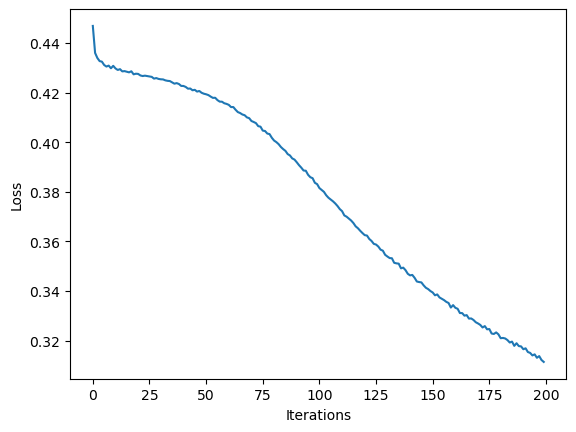

In [108]:
plt.plot(nn_clf.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## NN for Kmodes  Output 

In [99]:
X_train_kmodes = X_train.copy()
X_test_kmodes = X_test.copy()

In [100]:
X_train_kmodes['kmode_labels'] = kmode_labels
X_test_kmodes['kmode_labels'] = X_test_kmode_labels

In [101]:
X_train_kmodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183824 entries, 0 to 183823
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                183824 non-null  float64
 1   HighChol              183824 non-null  float64
 2   CholCheck             183824 non-null  float64
 3   BMI                   183824 non-null  float64
 4   Smoker                183824 non-null  float64
 5   Stroke                183824 non-null  float64
 6   HeartDiseaseorAttack  183824 non-null  float64
 7   PhysActivity          183824 non-null  float64
 8   Fruits                183824 non-null  float64
 9   Veggies               183824 non-null  float64
 10  HvyAlcoholConsump     183824 non-null  float64
 11  AnyHealthcare         183824 non-null  float64
 12  NoDocbcCost           183824 non-null  float64
 13  GenHlth               183824 non-null  float64
 14  MentHlth              183824 non-null  float64
 15  

In [102]:
nn_kmodes_clf = MLPClassifier(hidden_layer_sizes= (200,150,100), activation= 'tanh', learning_rate='adaptive', random_state=200)

In [103]:
%%time 
nn_kmodes_clf.fit(X_train_kmodes,y_train_true)

CPU times: total: 44.7 s
Wall time: 7min 53s


MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 150, 100),
              learning_rate='adaptive', random_state=200)

In [104]:
y_kmodes_pred = nn_kmodes_clf.predict(X_test_kmodes)
nn_f1_score = f1_score(y_test_true,y_kmodes_pred,average='weighted')
print(nn_f1_score)

0.7893494813795356


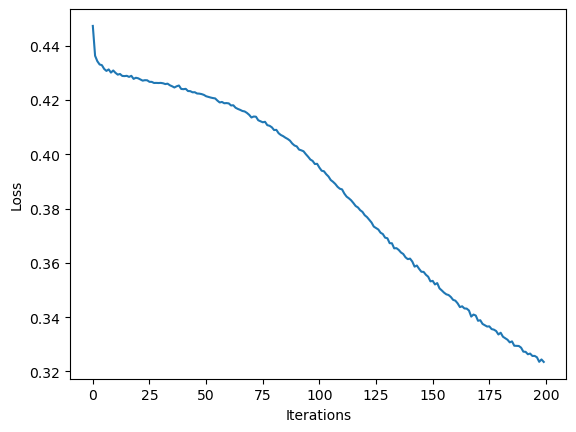

In [107]:
plt.plot(nn_kmodes_clf.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()